
# Non-structurated Wordcloud Model

Generating a wordcloud from non-structurated source.


In [6]:
%matplotlib inline
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords, wordnet
from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

In [7]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
#text = open(path.join(d, 'constitution.txt',encoding="utf8")).read()
text = open('csv/Informações_fornecedores.txt',encoding="utf8").read()
re.sub(r'[-./?!,":;()\']',' ',text)

'Projeto LINFO CCTI\n\nInformações gerais para a busca e seleção de\n\nfornecedores\n\nConsultoria especializada em Mapeamento de Demandas\n\ndo  Produtivo\n\nCampinas   SP  21 de abril de 2021\n\n\n\n\nObjetivos  documento e política de distribuição\n\n● Este documento foi elaborado para subsidiar o processo de busca e seleção de\nfornecedores do Projeto LINFO CCTI pelo departamento de Compras da Facti\n compras@facti com br  \n● Este documento pode  distribuído livremente  não havendo  nele  dados ou informações\nde caráter confidencial \n● Qualquer detalhamento adicional ensejará a assinatura prévia de Compromisso Unilateral de\nSigilo ou documento similar \n\n\n\n\nContextualização\n\nO Projeto LINFO CCTI é desenvolvido pela Facti na qualidade de Instituição Científica e\nTecnológica  ICT  Privada e tem por objetivo realizar a modelagem e implantação  em caráter\npiloto  de um Centro de Capacitação de Profissional  CCP  em TICs  com foco na capacitação de\nalunos do ensino Médio e 

In [8]:
#lista de Stopwords importadas da biblioteca nltk
myStopwords = nltk.corpus.stopwords.words('portuguese')

In [14]:
# array de palavras indesejadas a serem removidas
myStopwords = ["da", "meu", "em", "você", "de", "ao", "os", "\n", "por", "e", "da", "o", "é", "que","para", "cursos", "uma", "mais", "serão", "um", "além", "como", "pelo","das", "dos","aos", "as","na", "no","nas", "nos", "assim", "end", "oferecido", "á", "à", "através", "essa", "esse", "essas", "esses", "entre","tendo", "DF", "Certifique", "seu", "conhecimento", "considerações", "finais", "parte", "sobre", "none", "pagina","página", "objetivo", "tipo", "componente","aula","método","curso","está","também","oferece","pela","ampliando","seu","sua","apoio","vida","exemplo","conheça","seus","usando","forma","usar","mínima","anos","idade","minima","acesso", "alguns", "algum", "final","se", "estado", "região","empresas", "cidade", "grande", "foi", "maior","mil","onde","conta","tem","apelido","nesta","mão","segunda","localizada","frente","já","quatro","Pedro","meio","ou","será","tais","muito","ainda","Este","Neste", "uso", "escola", "escolas", "computador", "percepção", "alunos","realizada", "atividade", "sala", "número", "números","foram","compreender","vale","são", "trilhas","sistema", "trabalhando","criando", "objeto", "conteúdo", "aprenda", "usuário","comando","conteúdos", "IBM","SEDE","ampliar","proporcionar","gerando","lacunas","fechar","visando","requerido","sinergia","baixa","amplia","pessoas", "ser", "deste", "facti","O","às","podem","modo"] + list(STOPWORDS)

In [15]:
# Aplicação de colormap baseado em imagem previamente carregada.

mask = np.array(Image.open('img/Logo_FACTI.png'))
mask_colors = ImageColorGenerator(mask)

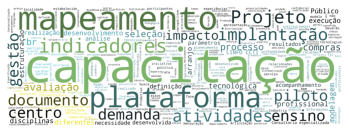

In [18]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=myStopwords,background_color="white",width=3200,height=1136,random_state=450,color_func=mask_colors,max_words=300).generate(text)

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='sinc')
plt.axis("off")
plt.imshow(wordcloud);
wordcloud.to_file("img/export/wordcloud_ns.png")

# The pil way 
#image = wordcloud.to_image()
#image.show()

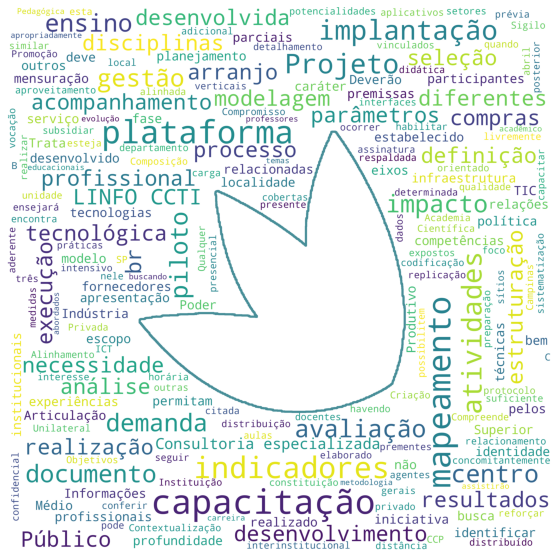

In [21]:
# Nuvem de palavras com base no csv com template
# endereço local do template
image_mask = np.array(Image.open("img/new_facti.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=myStopwords,
                      background_color="white",
                      width=3200, height=3200, 
                      max_font_size=200,
                      contour_color='#478e98',
                      contour_width=25,
                      min_font_size=5,mask=image_mask).generate(text)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='sinc')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("img/export/factiBG_wordcloud.png")

In [18]:
from nltk.corpus import sentiwordnet as swn
print (swn.senti_synset('love.n.01'))

<love.n.01: PosScore=0.625 NegScore=0.0>


In [ ]:
#facti colors
"#08C95"
"#2DCCD3"
"#EADA24"

In [ ]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 59 # 0 - 360
    s = 179 # 0 - 100
    l = 194 # 0 - 100return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 40 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100return "hsl({}, {}%, {}%)".format(h, s, l)